<a href="https://colab.research.google.com/github/what54210/what54210-Machine-Learning/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**手寫數字辨識**










In [ ]:
from tensorflow.keras.datasets.mnist import load_data
#((訓練圖片, 訓練答案),(測試圖片, 測試答案)0
load_data()
(x_train,y_train),(x_test,y_test) = load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,130,253,255,229,14,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,62,138,232,253,253,253,191,16,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,15,140,232,250,223,196,73,27,114,11,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,127,222,214,103,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,88,252,176,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,41,206,235,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


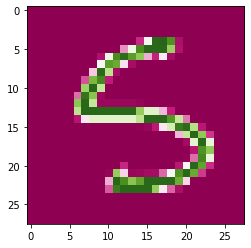

In [ ]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="PiYG")
#如果要讓顏色互換加_r,ex:PiYG_r
pd.DataFrame(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #Dropout隨機丟棄
layers = [
    Dense(512, activation="relu", input_dim=784), #28*28=78因上圖0~27
    # 784 * 128 + 128 = 100480
    Dense(10, activation="softmax")
    # 128 * 10 + 10(bias)
]
model = Sequential(layers)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# x: scaling 0-255 -> 0-1 框架(tf)隨機係數的關係
# y: one-hot encoding 十個答案
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255 #-1代表自己算,只能放一個位置
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0], y_train_cat[0])
# x_train_norm[0]

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 一個神經元: binary crossentropy 
# p*log*1/q + (1-p)*log1/(1-q)
# 多個神經元: categorical crossentropy 
# pl*log1/q1 +....
from tensorflow.keras.losses import CategoricalCrossentropy #SparseCategoricalCrossentropy 比較省ram
from tensorflow.keras.optimizers import Adam
model.compile(loss = CategoricalCrossentropy(),
       optimizer = Adam(),
       metrics=["accuracy"])

In [ ]:
# 訓練資料
# batch: 100 200(小圖片) 10 20(大圖片)
# epoch: 整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000 * 2 / 200次調整
# fit 訓練參數是接續上次的次數
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True), #寫進雲端裏頭
    EarlyStopping(patience=5,restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size = 100,
     epochs = 50, 
     validation_split=0.1,
     callbacks=callbacks,
     verbose = 2) #verbose把進度條修掉

Epoch 1/50
540/540 - 3s - loss: 0.2641 - accuracy: 0.9258 - val_loss: 0.1207 - val_accuracy: 0.9683
Epoch 2/50
540/540 - 3s - loss: 0.1083 - accuracy: 0.9679 - val_loss: 0.0926 - val_accuracy: 0.9743
Epoch 3/50
540/540 - 3s - loss: 0.0692 - accuracy: 0.9799 - val_loss: 0.0778 - val_accuracy: 0.9772
Epoch 4/50
540/540 - 3s - loss: 0.0501 - accuracy: 0.9853 - val_loss: 0.0690 - val_accuracy: 0.9790
Epoch 5/50
540/540 - 3s - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0673 - val_accuracy: 0.9803
Epoch 6/50
540/540 - 3s - loss: 0.0264 - accuracy: 0.9927 - val_loss: 0.0691 - val_accuracy: 0.9822
Epoch 7/50
540/540 - 3s - loss: 0.0195 - accuracy: 0.9945 - val_loss: 0.0754 - val_accuracy: 0.9813
Epoch 8/50
540/540 - 3s - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.0658 - val_accuracy: 0.9827
Epoch 9/50
540/540 - 3s - loss: 0.0111 - accuracy: 0.9974 - val_loss: 0.0680 - val_accuracy: 0.9818
Epoch 10/50
540/540 - 3s - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.0714 - val_accuracy: 0.9823

In [ ]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0630 - accuracy: 0.9810


[0.06300362199544907, 0.9810000061988831]

In [ ]:
# 手動儲存 : model.save("model.h5")
# if not os.path.exists("model.h5"):
#    newmodel/compile
# else:
#    load_model("model.h5")
from tensorflow.keras.models import load_model
load = load_model("model.h5")
# 不用在compile, 可以直接繼續fit
load.evaluate(x_test_norm, y_test_cat)


313/313 [==============================] - 1s 2ms/step - loss: 0.0630 - accuracy: 0.9810


[0.06300362199544907, 0.9810000061988831]

In [ ]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(正確)".format(n) for n in range(10)], #pat = "{}(正確){}" #pat.format(0,10)
       columns=["{}(預測)".format(n) for n in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),966,0,4,0,1,3,4,1,0,1
1(正確),0,1126,2,2,0,0,2,0,3,0
2(正確),1,1,1016,1,2,0,2,5,4,0
3(正確),0,0,4,987,0,6,0,7,3,3
4(正確),0,0,4,1,962,0,3,2,1,9
5(正確),1,0,0,4,1,878,4,2,1,1
6(正確),1,2,0,1,1,7,946,0,0,0
7(正確),0,4,6,1,1,0,0,1009,3,4
8(正確),2,0,3,7,4,5,2,5,944,2
9(正確),1,2,0,9,8,7,2,4,0,976


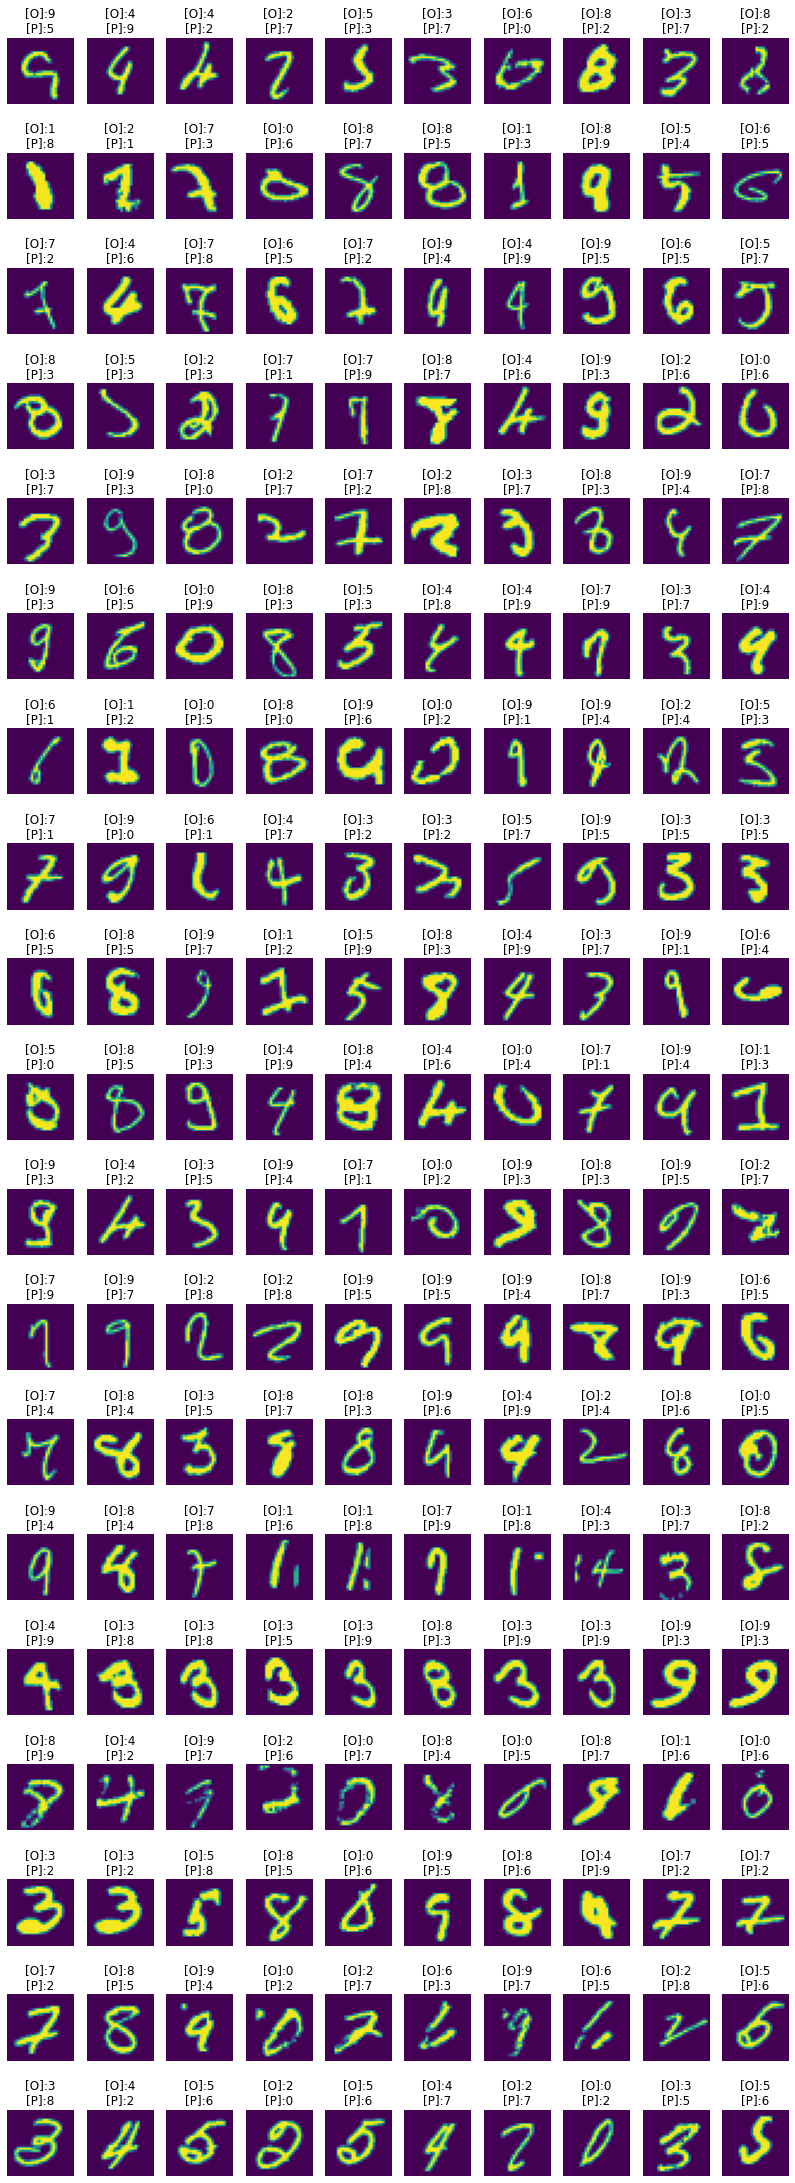

In [ ]:
# subplot(總高度, 總寬度, ith)
# 印出模型
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_label = y_test[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[O]:{}\n[P]:{}".format(false_label[i], false_pre[i])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])


In [ ]:
# pip install pillow 
import PIL
fn = input("檔名")
img = PIL.Image.open(fn).convert("L").resize((28, 28))
img_np = np.array(img)
test = img_np.reshape(1, 784) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
    print(i, "的機率是:", round(p, 3))
plt.imshow(img_np)